# TuC Datenanalyse

In [35]:
# imports
%matplotlib inline
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# load data and remove unnamed row
data = pd.read_csv('../data/order.tbl.short', sep='|')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [37]:
# Overview
number_of_rows = len(data)
print('Number of lines: ', number_of_rows)
header = data.columns.tolist()
print('Headers: ', ','.join(header))
print('First 3 rows:')
data[:3]

Number of lines:  9000000
Headers:  ORDERKEY,CUSTKEY,ORDERSTATUS,TOTALPRICE,ORDERDATE,ORDERPRIORITY,CLERK,SHIPPRIORITY,COMMENT
First 3 rows:


,ORDERKEY,CUSTKEY,ORDERSTATUS,TOTALPRICE,ORDERDATE,ORDERPRIORITY,CLERK,SHIPPRIORITY,COMMENT
0,1,468010,O,116666.88,1996-01-02,5-LOW,Clerk#000005704,0,jSmgxOi157kxm gCwQzgNOmiO0MkhCR4N BLj6OQBkl34k...
1,2,468010,O,19444.48,1996-01-02,5-LOW,Clerk#000005704,0,jP0BgO31m7Sw6LmC25k3RBw BmRkkjmzBCO4Qij67CN3mQ...
2,3,468010,O,116666.88,1996-01-02,1-URGENT,Clerk#000005704,0,xxSzlw2hwnM10PijiOz2gP02Qh3OQgm02ykNOwPxhl xRM...


# Cardinalities

### Unique Values per Column

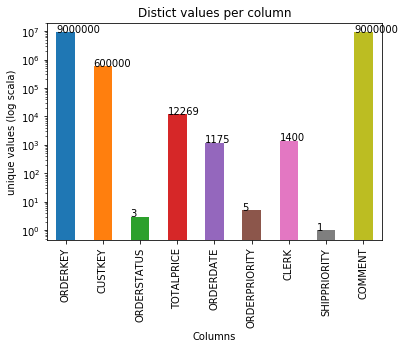

In [57]:
ax = data.apply(pd.Series.nunique).plot(kind='bar', logy=True, title='Distict values per column')
ax.set(xlabel="Columns", ylabel="unique values (log scala)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

### Value distribution per Column

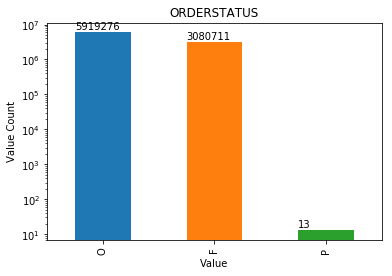

In [54]:
header = 'ORDERSTATUS'
ax = data[header].value_counts().plot(kind='bar', logy=True, title=header)
ax.set(xlabel="Value", ylabel="Value Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.2))
ax

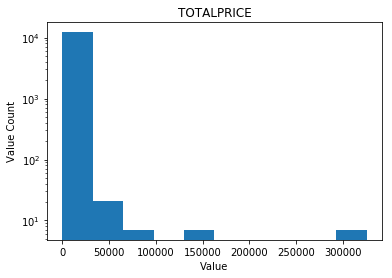

In [55]:
header = 'TOTALPRICE'
# TODO find better plot type
ax = data[header].value_counts().plot(kind='hist', title=header, logy=True)
ax.set(xlabel="Value", ylabel="Value Count")
ax

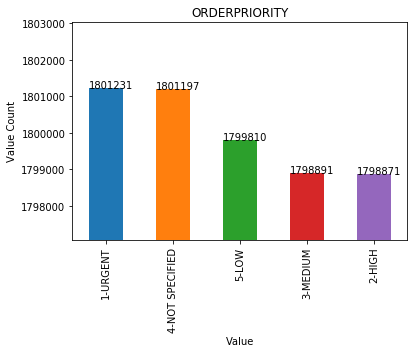

In [56]:
header = 'ORDERPRIORITY'
min_value = data[header].value_counts().min()
max_value = data[header].value_counts().max()
ax = data[header].value_counts().plot(kind='bar', title=header)
ax.set(xlabel="Value", ylabel="Value Count", ylim = (min_value * 0.999, max_value * 1.001))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax

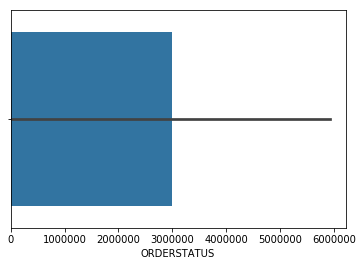

In [29]:
sns.barplot(data['ORDERSTATUS'].value_counts())

# Null Values per Column

In [30]:
data.isnull().sum()

ORDERKEY         0
CUSTKEY          0
ORDERSTATUS      0
TOTALPRICE       0
ORDERDATE        0
ORDERPRIORITY    0
CLERK            0
SHIPPRIORITY     0
COMMENT          0
dtype: int64

In [31]:
data.dtypes

ORDERKEY           int64
CUSTKEY            int64
ORDERSTATUS       object
TOTALPRICE       float64
ORDERDATE         object
ORDERPRIORITY     object
CLERK             object
SHIPPRIORITY       int64
COMMENT           object
dtype: object

## Min & Max Values


In [32]:
print('Min Values:')
print(data.apply(pd.Series.min))
print('\n\nMax Values:')
print(data.apply(pd.Series.max))

Min Values:
ORDERKEY                                                   1
CUSTKEY                                                    1
ORDERSTATUS                                                F
TOTALPRICE                                           1023.79
ORDERDATE                                         1992-01-01
ORDERPRIORITY                                       1-URGENT
CLERK                                        Clerk#000000006
SHIPPRIORITY                                               0
COMMENT               1AhQw1lwMCgO72NSlQC3gmimCy4y2C6iR127A3
dtype: object


Max Values:
ORDERKEY                       36000000
CUSTKEY                          899999
ORDERSTATUS                           P
TOTALPRICE                       700421
ORDERDATE                    1998-08-02
ORDERPRIORITY                     5-LOW
CLERK                   Clerk#000005995
SHIPPRIORITY                          0
COMMENT          zzzzzP2B6OPmj6yQCCN5jj
dtype: object


# Compression

Text(0.5,0,'Column Name')

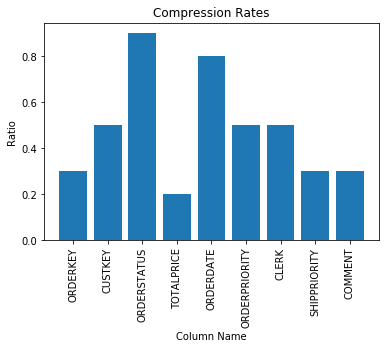

In [33]:
# TODO Add Mock csv
data = pd.read_csv('../data/compression_ratios.csv', sep=',')
plot = plt.bar(data.columns.tolist(), list(data.iloc[0]))
plt.xticks(rotation=90)
plt.title('Compression Rates')
plt.ylabel('Ratio')
plt.xlabel('Column Name')

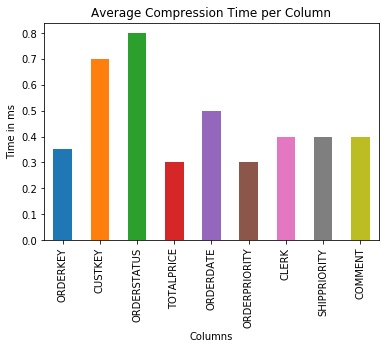

In [34]:
# TODO Add Mock csv
data = pd.read_csv('../data/compression_times.csv', sep=',')
ax = data.apply(pd.Series.mean).plot(kind='bar', title='Average Compression Time per Column')
ax.set(xlabel='Columns', ylabel='Time in ms')
ax